<a href="https://colab.research.google.com/github/Diveesha909/Creatyourcontent/blob/main/EDA_influencer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

# Replace '/path/to/your/downloaded/influencers.txt' with the actual path to your file
try:
    influencers_df = pd.read_csv("/content/influencers.txt", sep='\t', skiprows=[1])
    print("Influencers data loaded successfully:")
    display(influencers_df.head())
except FileNotFoundError:
    print("Error: influencers.txt not found. Please check the path to the downloaded file.")
except Exception as e:
    print(f"An error occurred while loading influencers.txt: {e}")

Influencers data loaded successfully:


,Username,Category,#Followers,#Followees,#Posts
0,makeupbynvs,beauty,1432,1089,363
1,jaquelinevandoski,beauty,137600,548,569
2,anisaartistry,beauty,64644,289,391
3,rubina_muartistry,beauty,496406,742,887
4,beautyxabbi,beauty,2050,1423,751


In [19]:
influencers_df.describe()

,#Followers,#Followees,#Posts
count,3.393500e+04,33935.000000,33935.000000
mean,1.403299e+05,1531.588242,1487.183409
std,1.245163e+06,2274.896034,2187.174919
min,1.000000e+03,0.000000,100.000000
25%,4.951500e+03,557.000000,538.000000
50%,1.612500e+04,974.000000,937.000000
75%,5.356550e+04,1828.000000,1732.000000
max,9.647601e+07,304758.000000,127520.000000


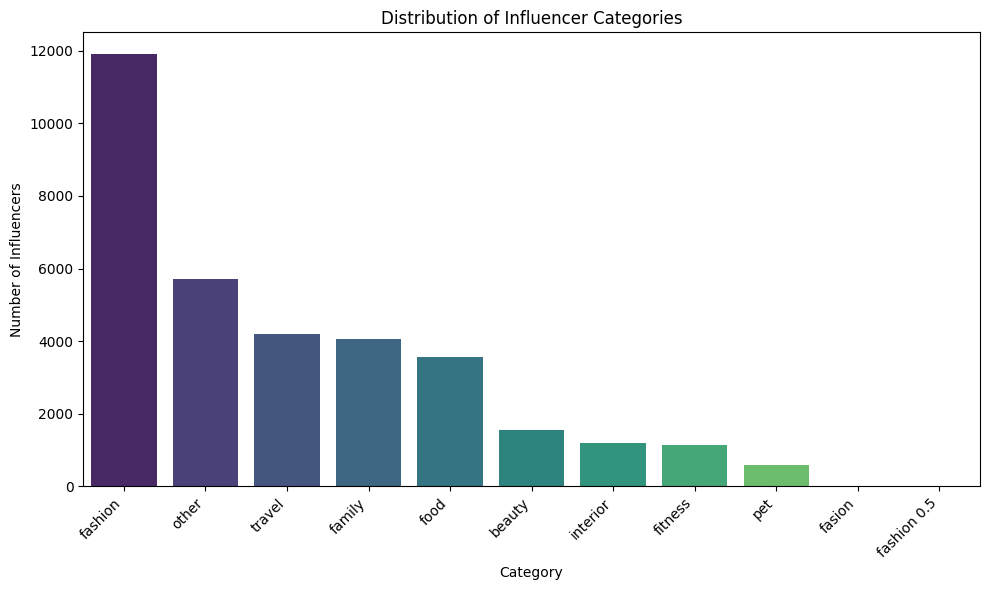

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category
category_counts = influencers_df['Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis', hue=category_counts.index, legend=False)
plt.title('Distribution of Influencer Categories')
plt.xlabel('Category')
plt.ylabel('Number of Influencers')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

With the eabove bar chart, we can make the few observations:
1. 'fashion' category has the most number of influencers; it has almost double the number of influencers compared to the next most popular catrgory - 'other'
2. 'fasion' and 'fashion 0.5' have one or no entries, and seem likely as a result of a typo. We can remove the data entries with this category.

In [23]:
# Remove rows with 'fasion' and 'fashion 0.5' categories
influencers_df_cleaned = influencers_df[~influencers_df['Category'].isin(['fasion', 'fashion 0.5'])].copy()

# You can also check the category counts in the cleaned DataFrame
print("\nCategory counts in cleaned DataFrame:")
display(influencers_df_cleaned['Category'].value_counts())


Category counts in cleaned DataFrame:


,count
Category,
fashion,11911
other,5720
travel,4210
family,4070
food,3565
beauty,1542
interior,1195
fitness,1133
pet,587
